#1.IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#2.IMPORTING THE DATASET

In [ ]:
data=pd.read_csv("/content/archive (1).zip", encoding='latin-1')
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


#3.DATA EXPLORATION

In [ ]:
#number of rows and columns
data.shape

(15509, 10)

In [ ]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
#checking for missing values
data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


#4.HANDLING THE MISSING VALUES

In [ ]:
data = data[['Genre','Year','Duration','Rating','Votes','Director','Actor 1', 'Name']].dropna()
data

,Genre,Year,Duration,Rating,Votes,Director,Actor 1,Name
1,Drama,(2019),109 min,7.0,8,Gaurav Bakshi,Rasika Dugal,#Gadhvi (He thought he was Gandhi)
3,"Comedy, Romance",(2019),110 min,4.4,35,Ovais Khan,Prateik,#Yaaram
5,"Comedy, Drama, Musical",(1997),147 min,4.7,827,Rahul Rawail,Bobby Deol,...Aur Pyaar Ho Gaya
6,"Drama, Romance, War",(2005),142 min,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,...Yahaan
8,"Horror, Mystery, Thriller",(2012),82 min,5.6,326,Allyson Patel,Yash Dave,?: A Question Mark
...,...,...,...,...,...,...,...,...
15493,Drama,(2015),115 min,6.1,408,Mozez Singh,Vicky Kaushal,Zubaan
15494,"Biography, Drama, History",(2001),153 min,6.2,"1,496",Shyam Benegal,Karisma Kapoor,Zubeidaa
15503,"Action, Crime, Drama",(1989),125 min,5.8,44,S.P. Muthuraman,Chiranjeevi,Zulm Ki Zanjeer
15505,"Action, Drama",(1999),129 min,4.5,655,Kuku Kohli,Akshay Kumar,Zulmi


In [ ]:
data.isnull().sum()

,0
Genre,0
Year,0
Duration,0
Rating,0
Votes,0
Director,0
Actor 1,0
Name,0
liked,0


#5.VISUALIZING THE DATASET

### TOP 5 GENRES BY AVERAGE MOVIE RATING


Top 5 Genres by average rating
Genre
History, Romance                9.4
Documentary, Family, History    9.3
Documentary, Music              8.9
Documentary, Thriller           8.7
Documentary, Sport              8.6
Name: Rating, dtype: float64


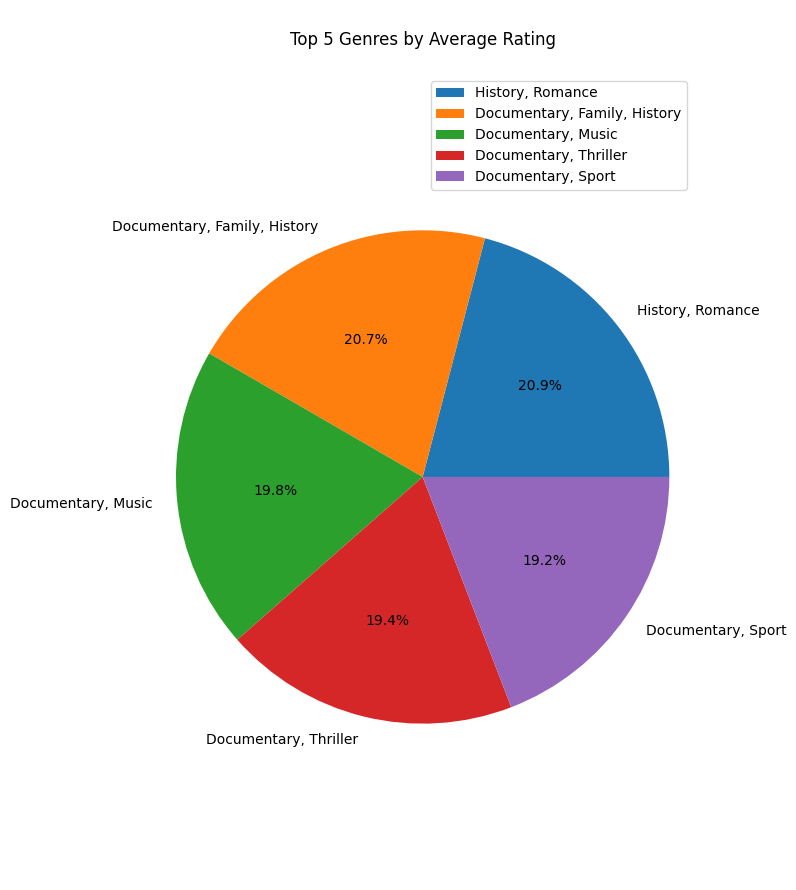

In [ ]:
top_genres = data.groupby('Genre')['Rating'].mean().nlargest(5)
print("\nTop 5 Genres by average rating")
print(top_genres)
plt.figure(figsize=(8,9))
plt.pie(top_genres,labels=top_genres.index, autopct='%1.1f%%')
plt.title('\nTop 5 Genres by Average Rating\n')
plt.axis('equal')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

### TOP 5 MOVIES BY AVERAGE MOVIE RATING


Top 10 Movies by average rating
Name
Love Qubool Hai        10.0
Half Songs              9.7
Gho Gho Rani            9.4
June                    9.4
The Reluctant Crime     9.4
Name: Rating, dtype: float64


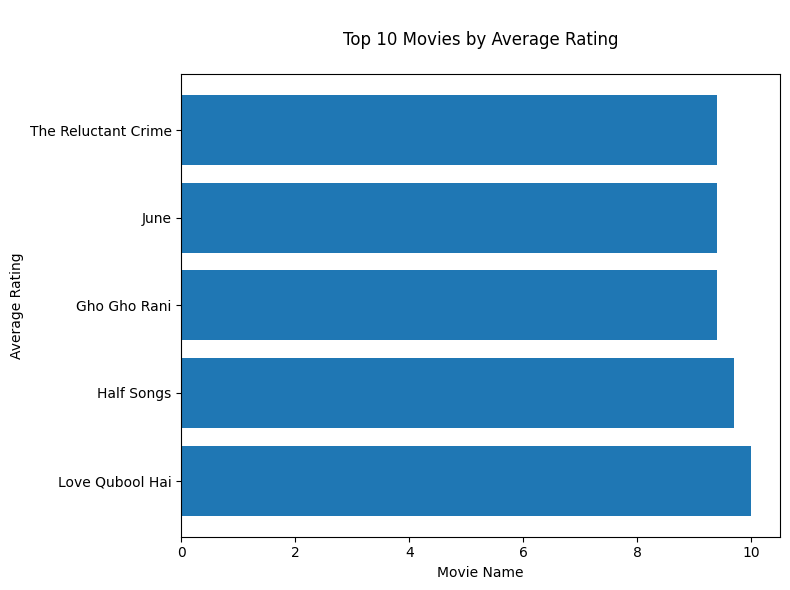

In [ ]:
Top_movies=data.groupby('Name')['Rating'].mean().nlargest(5)
print("\nTop 10 Movies by average rating")
print(Top_movies)
plt.figure(figsize=(8,6))
plt.barh(Top_movies.index,Top_movies.values)
plt.xlabel('Movie Name')
plt.ylabel('Average Rating')
plt.title('\nTop 10 Movies by Average Rating\n')
plt.tight_layout()
plt.show()

### TOP 5 ACTOR BY AVERAGE MOVIE RATING


Top 5 Actors by average rating
Actor 1
Ahaan Jha            10.0
Raj Banerjee          9.7
Dharmendra Ahir       9.4
Nishi Neha Mishra     9.4
Vaibhav Khisti        9.4
Name: Rating, dtype: float64


Text(0.5, 1.0, '\nTop 5 Actors by Average Rating\n')

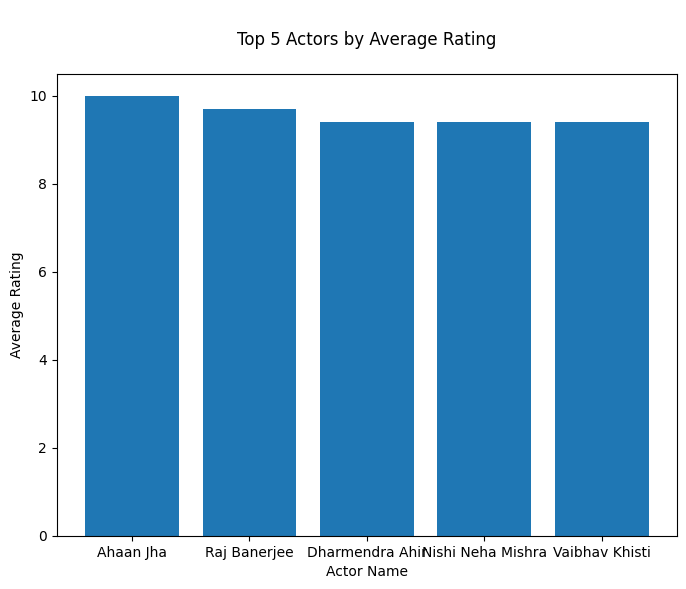

In [ ]:
Top_actors=data.groupby('Actor 1')['Rating'].mean().nlargest(5)
print("\nTop 5 Actors by average rating")
print(Top_actors)
plt.figure(figsize=(8,6))
plt.bar(Top_actors.index,Top_actors.values)
plt.xlabel('Actor Name')
plt.ylabel('Average Rating')
plt.title('\nTop 5 Actors by Average Rating\n')

#6.SPLITING THE DATA INTO TEST & TRAIN DATA

In [ ]:
data['Rating']=pd.to_numeric(data['Rating'], errors='coerce')
data['liked'] = data['Rating'].apply(lambda x: 1 if x >= 7 else 0)
X = data[['Rating']]
y = data['liked']
print(X)

       Rating
1         7.0
3         4.4
5         4.7
6         7.4
8         5.6
...       ...
15493     6.1
15494     6.2
15503     5.8
15505     4.5
15508     6.2

[5746 rows x 1 columns]


In [ ]:
print(y)

1        1
3        0
5        0
6        1
8        0
        ..
15493    0
15494    0
15503    0
15505    0
15508    0
Name: liked, Length: 5746, dtype: int64


#7.TRAIN THEMODEL

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4309, 1), (1437, 1), (4309,), (1437,))

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#8.EVALUATE THE MODEL

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1076
           1       1.00      1.00      1.00       361

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437

Confusion Matrix:
 [[1076    0]
 [   0  361]]
